In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
import os
import json
import numpy as np
from PIL import Image
from tqdm import tqdm

drive.mount('/content/drive')

Mounted at /content/drive


Data Exploring

In [ ]:
import json
import os

# Paths
json_path = "/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/labels/VID68.json"
frames_folder = "/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/videos/VID68"

# Load the JSON
with open(json_path, "r") as f:
    data = json.load(f)

print(data)

{'info': {'dataset': 'cholect50-challenge-validation', 'year': 2022, 'version': 1.5, 'description': 'Dataset for surgical action triplet detection and recognition', 'contributor': 'Chinedu I. Nwoye, T. Yu, C. Gonzalez, B. Seeliger, P. Mascagni, D. Mutter, J. Marescaux, N. Padoy', 'copyright': 'CAMMA, ICube, University of Strasbourg, France', 'url': 'http://camma.u-strasbg.fr/', 'date_created': '2021-05-01', 'bbox format': '[x1,y1,bw,bh] == [top_left_x, top_left_y, box_width, box_height]'}, 'licenses': {'id': 1, 'name': 'Creative Commons license CC BY-NC-SA 4.0 LICENSE', 'url': 'https://creativecommons.org/licenses/by-nc-sa/4.0/'}, 'categories': {'instrument': {'0': 'grasper', '1': 'bipolar', '2': 'hook', '3': 'scissors', '4': 'clipper', '5': 'irrigator'}, 'verb': {'0': 'grasp', '1': 'retract', '2': 'dissect', '3': 'coagulate', '4': 'clip', '5': 'cut', '6': 'aspirate', '7': 'irrigate', '8': 'pack', '9': 'null_verb'}, 'target': {'0': 'gallbladder', '1': 'cystic_plate', '2': 'cystic_duct'

In [ ]:
data.keys()

dict_keys(['info', 'licenses', 'categories', 'video', 'fps', 'num_frames', 'annotations'])

In [ ]:
data['info']

{'dataset': 'cholect50-challenge-validation',
 'year': 2022,
 'version': 1.5,
 'description': 'Dataset for surgical action triplet detection and recognition',
 'contributor': 'Chinedu I. Nwoye, T. Yu, C. Gonzalez, B. Seeliger, P. Mascagni, D. Mutter, J. Marescaux, N. Padoy',
 'copyright': 'CAMMA, ICube, University of Strasbourg, France',
 'url': 'http://camma.u-strasbg.fr/',
 'date_created': '2021-05-01',
 'bbox format': '[x1,y1,bw,bh] == [top_left_x, top_left_y, box_width, box_height]'}

In [ ]:
data['categories']

{'instrument': {'0': 'grasper',
  '1': 'bipolar',
  '2': 'hook',
  '3': 'scissors',
  '4': 'clipper',
  '5': 'irrigator'},
 'verb': {'0': 'grasp',
  '1': 'retract',
  '2': 'dissect',
  '3': 'coagulate',
  '4': 'clip',
  '5': 'cut',
  '6': 'aspirate',
  '7': 'irrigate',
  '8': 'pack',
  '9': 'null_verb'},
 'target': {'0': 'gallbladder',
  '1': 'cystic_plate',
  '2': 'cystic_duct',
  '3': 'cystic_artery',
  '4': 'cystic_pedicle',
  '5': 'blood_vessel',
  '6': 'fluid',
  '7': 'abdominal_wall_cavity',
  '8': 'liver',
  '9': 'adhesion',
  '10': 'omentum',
  '11': 'peritoneum',
  '12': 'gut',
  '13': 'specimen_bag',
  '14': 'null_target'},
 'phase': {'0': 'preparation',
  '1': 'carlot-triangle-dissection',
  '2': 'clipping-and-cutting',
  '3': 'gallbladder-dissection',
  '4': 'gallbladder-packaging',
  '5': 'cleaning-and-coagulation',
  '6': 'gallbladder-extraction'},
 'triplet': {'0': 'grasper,dissect,cystic_plate',
  '1': 'grasper,dissect,gallbladder',
  '2': 'grasper,dissect,omentum',
  '

In [ ]:
data['num_frames']

243

In [ ]:
data['video']

68

In [ ]:
data['fps']

1

In [ ]:
data['annotations']

{'16': [[7,
   0,
   1.0,
   0.5077519379844961,
   0.21658986175115208,
   0.3049095607235142,
   0.27880184331797236,
   0,
   0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   0],
  [19,
   0,
   1.0,
   0.3423772609819121,
   0.652073732718894,
   0.24806201550387597,
   0.16589861751152074,
   1,
   8,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   0],
  [94,
   0,
   1.0,
   0.4560723514211886,
   0.7119815668202765,
   0.4198966408268734,
   0.27880184331797236,
   9,
   14,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   0]],
 '23': [[7,
   0,
   1.0,
   0.14599483204134367,
   0.347926267281106,
   0.3785529715762274,
   0.16820276497695852,
   0,
   0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   0],
  [17,
   0,
   1.0,
   0.4405684754521964,
   0.4032258064516129,
   0.2842377260981912,
   0.21889400921658986,
   1,
   0,
   1.0,
   -1.0,
   -1.0,
   -1.0,
   -1.0,
   0],
  [94,
   0,
   1.0,
   0.4354005167958656,
   0.7488479262672811,
   0.4392764857881137,
   0.2465437

In [ ]:
data['categories']['phase']

{'0': 'preparation',
 '1': 'carlot-triangle-dissection',
 '2': 'clipping-and-cutting',
 '3': 'gallbladder-dissection',
 '4': 'gallbladder-packaging',
 '5': 'cleaning-and-coagulation',
 '6': 'gallbladder-extraction'}

In [ ]:
import os

folder_path = "/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/videos/VID68"
frame_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]  # only images
num_frames = len(frame_files)

print(f"Number of frames in VID68: {num_frames}")

Number of frames in VID68: 266


In [ ]:
import json
import os

# Paths
video_folder = "/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/videos/VID68"
label_file = "/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/labels/VID68.json"

# Load JSON
with open(label_file, 'r') as f:
    data = json.load(f)

# Get categories mapping for phase
phase_mapping = data['categories']['phase']  # {'0': 'preparation', '1': ..., '6': ...}

# First frame filename
first_frame = sorted(os.listdir(video_folder))[0]  # e.g., '000000.png'
frame_index = int(first_frame.split('.')[0])  # '000000' -> 0

# Get annotations for this frame
frame_annotations = data['annotations'].get(str(frame_index), [])

if frame_annotations:  # frame has triplets
    # Phase ID is at index 8 (from CholecT50 documentation)
    phase_id = frame_annotations[0][8]
    phase_name = phase_mapping[str(phase_id)]
else:
    phase_name = "unknown"

print(f"Frame: {first_frame}, Phase: {phase_name}")

Frame: 000016.png, Phase: preparation


Data Processing

In [ ]:
phase_dict = {'0': 'preparation',
              '1': 'carlot-triangle-dissection',
              '2': 'clipping-and-cutting',
              '3': 'gallbladder-dissection',
              '4': 'gallbladder-packaging',
              '5': 'cleaning-and-coagulation',
              '6': 'gallbladder-extraction'}

# Reverse mapping for label encoding
phase_to_idx = {v: int(k) for k, v in phase_dict.items()}

In [ ]:
import os
import json
import cv2
import re
import numpy as np

# Paths to videos and labels
videos_path = "/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/videos"
labels_path = "/content/drive/MyDrive/NUS_ISS_Talent_Experience_Resumes/cholect50-challenge-val/labels"

# Phase mapping (from your earlier inspection)
phase_mapping = {
    '0': 'preparation',
    '1': 'carlot-triangle-dissection',
    '2': 'clipping-and-cutting',
    '3': 'gallbladder-dissection',
    '4': 'gallbladder-packaging',
    '5': 'cleaning-and-coagulation',
    '6': 'gallbladder-extraction'
}

X = []
Y = []

# Loop through all videos
for vid_folder in sorted(os.listdir(videos_path)):
    vid_path = os.path.join(videos_path, vid_folder)

    # Skip non-folders
    if not os.path.isdir(vid_path):
        continue

    # Corresponding label JSON
    label_file = f"{vid_folder}.json"
    label_path = os.path.join(labels_path, label_file)

    if not os.path.exists(label_path):
        print(f"Warning: {label_path} not found, skipping {vid_folder}")
        continue

    # Load JSON labels
    with open(label_path, 'r') as f:
        data = json.load(f)

    # Build a mapping of frame_number -> phase_id
    annotations = data['annotations']
    frame_phase = {}
    for frame_id, triplets in annotations.items():
        frame_number = int(frame_id)
        if len(triplets) > 0:
            # Phase ID is at index 14 in triplet vector
            phase_id = triplets[0][14]
        else:
            phase_id = 0  # default to 0 if no triplet
        frame_phase[frame_number] = phase_id

    # Process all frame images
    frame_files = sorted([f for f in os.listdir(vid_path) if f.endswith('.png')])
    for frame_file in frame_files:
        # Extract leading number from filename (handles '000030 (1).png')
        match = re.match(r"(\d+)", frame_file)
        if match:
            frame_number = int(match.group(1))
        else:
            continue  # skip invalid filenames

        phase_id = frame_phase.get(frame_number, 0)

        # Read image
        img_path = os.path.join(vid_path, frame_file)
        img = cv2.imread(img_path)
        if img is None:
            continue

        # Resize and convert to RGB
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        X.append(img)
        Y.append(phase_id)

# Convert lists to numpy arrays
X = np.array(X, dtype=np.float32) / 255.0  # normalize
Y = np.array(Y, dtype=np.int64)

print(f"Total frames processed: {len(X)}")
print(f"X shape: {X.shape}, Y shape: {Y.shape}")

Total frames processed: 1318
X shape: (1318, 224, 224, 3), Y shape: (1318,)


In [ ]:
set(Y)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6)}

In [ ]:
X.shape

(1318, 224, 224, 3)

In [ ]:
Y.shape

(1318,)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# -----------------------------
# 1. Split the data
# -----------------------------
# Train 70%, Val 15%, Test 15%
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# -----------------------------
# 2. Normalize images
# -----------------------------
X_train = X_train.astype('float32') #/ 255.0
X_val   = X_val.astype('float32') #/ 255.0
X_test  = X_test.astype('float32') #/ 255.0

# -----------------------------
# 3. One-hot encode labels
# -----------------------------
num_classes = len(np.unique(Y))
Y_train = to_categorical(Y_train, num_classes)
Y_val   = to_categorical(Y_val, num_classes)
Y_test  = to_categorical(Y_test, num_classes)

Train: (833, 224, 224, 3), Val: (178, 224, 224, 3), Test: (179, 224, 224, 3)


In [ ]:
X_train[0][0][0][0]

np.float32(0.0)

Model Building

Simple Model First

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,471 (84.86 MB)

 Trainable params: 22,246,471 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=10,
    batch_size=16
)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.2495 - loss: 1.9091 - val_accuracy: 0.2753 - val_loss: 1.8479
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.2611 - loss: 1.8685 - val_accuracy: 0.2753 - val_loss: 1.8438
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.2684 - loss: 1.8448 - val_accuracy: 0.2753 - val_loss: 1.8337
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.2713 - loss: 1.8571 - val_accuracy: 0.2753 - val_loss: 1.8327
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.2526 - loss: 1.8754 - val_accuracy: 0.2753 - val_loss: 1.8321
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.2696 - loss: 1.8630 - val_accuracy: 0.2753 - val_loss: 1.8312
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.2569 - loss: 1.8511 - val_accuracy: 0.2753 - val_loss: 1.8315
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.2616 - loss: 1.8057 - val_accuracy: 0.2753 - v

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2711 - loss: 1.8376
Test Accuracy: 27.37%


Further Analysis

In [ ]:
import numpy as np
from collections import Counter

# Convert one-hot back to class indices if needed
y_classes = np.argmax(Y, axis=1) if Y.ndim > 1 else Y
class_counts = Counter(y_classes)

print("Class distribution:")
for cls, count in class_counts.items():
    print(f"Phase {cls}: {count} frames")

Class distribution:
Phase 0: 149 frames
Phase 1: 217 frames
Phase 2: 282 frames
Phase 3: 338 frames
Phase 4: 115 frames
Phase 5: 143 frames
Phase 6: 74 frames


In [ ]:
import numpy as np
import albumentations as A
import cv2
from tqdm import tqdm
from collections import Counter

# Define augmentation pipeline
augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Blur(blur_limit=3, p=0.3),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.RandomCrop(height=200, width=200, p=0.5),
    A.Resize(height=224, width=224)  # make sure final size is correct
])

# Target minimum per class
MIN_SAMPLES = 300

X_balanced, Y_balanced = [], []

# Count original distribution
counts = Counter(Y)
print("Original class distribution:", counts)

# Loop through each class
for cls in np.unique(Y):
    cls_indices = np.where(Y == cls)[0]
    X_cls = X[cls_indices]
    Y_cls = Y[cls_indices]

    # Always keep originals
    X_balanced.extend(X_cls)
    Y_balanced.extend(Y_cls)

    # How many more needed?
    n_to_add = max(0, MIN_SAMPLES - len(X_cls))

    if n_to_add > 0:
        print(f"Augmenting class {cls} with {n_to_add} new samples...")
        for _ in tqdm(range(n_to_add)):
            idx = np.random.randint(0, len(X_cls))
            img = X_cls[idx]

            # Albumentations expects uint8
            img = (img * 255).astype(np.uint8)

            aug_img = augment(image=img)["image"]

            # Scale back to [0,1]
            aug_img = aug_img.astype(np.float32) / 255.0

            X_balanced.append(aug_img)
            Y_balanced.append(cls)

# Convert to arrays
X_balanced = np.array(X_balanced)
Y_balanced = np.array(Y_balanced)

# Check new distribution
new_counts = Counter(Y_balanced)
print("New class distribution:", new_counts)
print("Final shapes -> X:", X_balanced.shape, ", Y:", Y_balanced.shape)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


Original class distribution: Counter({np.int64(3): 338, np.int64(2): 282, np.int64(1): 217, np.int64(0): 149, np.int64(5): 143, np.int64(4): 115, np.int64(6): 74})
Augmenting class 0 with 151 new samples...


100%|██████████| 151/151 [00:00<00:00, 808.56it/s]


Augmenting class 1 with 83 new samples...


100%|██████████| 83/83 [00:00<00:00, 1002.61it/s]


Augmenting class 2 with 18 new samples...


100%|██████████| 18/18 [00:00<00:00, 883.39it/s]


Augmenting class 4 with 185 new samples...


100%|██████████| 185/185 [00:00<00:00, 974.12it/s]


Augmenting class 5 with 157 new samples...


100%|██████████| 157/157 [00:00<00:00, 1025.90it/s]


Augmenting class 6 with 226 new samples...


100%|██████████| 226/226 [00:00<00:00, 911.11it/s]


New class distribution: Counter({np.int64(3): 338, np.int64(0): 300, np.int64(1): 300, np.int64(2): 300, np.int64(4): 300, np.int64(5): 300, np.int64(6): 300})
Final shapes -> X: (2138, 224, 224, 3) , Y: (2138,)


In [ ]:
# Print new class distribution
counter_new = Counter(Y_balanced)
print("\nNew class distribution:")
for cls, count in counter_new.items():
    print(f"Phase {cls}: {count} frames")

X_aug = np.array(X_balanced)
Y_aug = np.array(Y_balanced)
print(f"\nTotal frames after augmentation: {len(Y_aug)}")
print(f"X_aug shape: {X_aug.shape}, Y_aug shape: {Y_aug.shape}")


New class distribution:
Phase 0: 300 frames
Phase 1: 300 frames
Phase 2: 300 frames
Phase 3: 338 frames
Phase 4: 300 frames
Phase 5: 300 frames
Phase 6: 300 frames

Total frames after augmentation: 2138
X_aug shape: (2138, 224, 224, 3), Y_aug shape: (2138,)


In [ ]:
np.save('X_phase.npy', X_aug)
np.save('Y_phase.npy', Y_aug)

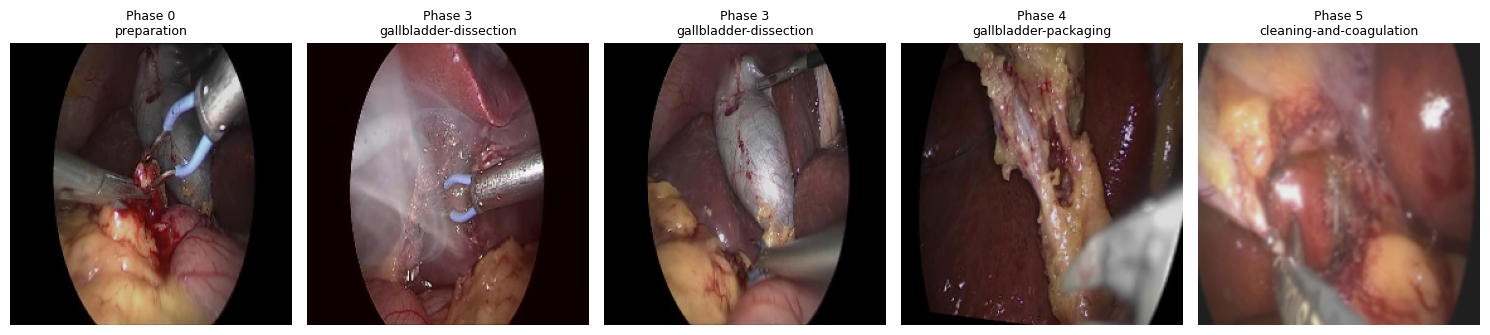

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Phase ID to Name mapping
phase_id_to_name = {
    0: 'preparation',
    1: 'carlot-triangle-dissection',
    2: 'clipping-and-cutting',
    3: 'gallbladder-dissection',
    4: 'gallbladder-packaging',
    5: 'cleaning-and-coagulation',
    6: 'gallbladder-extraction'
}

# Pick 5 random indices
indices = random.sample(range(len(X_aug)), 5)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(indices, 1):
    img = X_aug[idx]

    # Rescale if needed (0–255 and convert to uint8)
    if img.max() <= 1.0:
        img_disp = (img * 255).astype("uint8")
    else:
        img_disp = img.astype("uint8")

    label_id = int(Y_aug[idx])
    label_name = phase_id_to_name[label_id]

    plt.subplot(1, 5, i)
    plt.imshow(img_disp)
    plt.title(f"Phase {label_id}\n{label_name}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

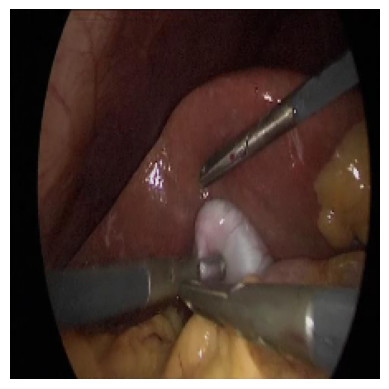

Min pixel value: 0.0
Max pixel value: 0.9882353


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Show the first image
plt.imshow(X[0])
plt.axis('off')
plt.show()

# Check the pixel value range
print("Min pixel value:", np.min(X[0]))
print("Max pixel value:", np.max(X[0]))

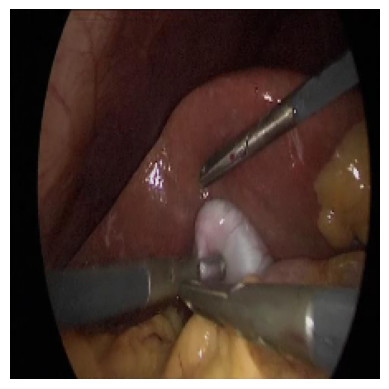

Min pixel value: 0.0
Max pixel value: 0.9882353


In [ ]:
# Show the first image
plt.imshow(X_aug[0])
plt.axis('off')
plt.show()

# Check the pixel value range
print("Min pixel value:", np.min(X_aug[0]))
print("Max pixel value:", np.max(X_aug[0]))

In [ ]:
Y_aug[350:360]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
Y_aug[650:660]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import tensorflow as tf
# Stratified split
from sklearn.model_selection import train_test_split
trainX, tempX, trainY, tempY = train_test_split(X_aug, Y_aug, test_size=0.2, stratify=Y_aug, random_state=42)
valX, testX, valY, testY = train_test_split(tempX, tempY, test_size=0.5, stratify=tempY, random_state=42)

print("Train:", trainX.shape, trainY.shape)
print("Val:", valX.shape, valY.shape)
print("Test:", testX.shape, testY.shape)

# One-hot encode labels
#num_classes = len(np.unique(Y_aug))
#trainY_cat = tf.keras.utils.to_categorical(trainY, num_classes)
#valY_cat   = tf.keras.utils.to_categorical(valY, num_classes)
#testY_cat  = tf.keras.utils.to_categorical(testY, num_classes)

Train: (1710, 224, 224, 3) (1710,)
Val: (214, 224, 224, 3) (214,)
Test: (214, 224, 224, 3) (214,)


Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

num_classes = 7
IMG_SIZE = (224, 224, 3)
SEED = 42

# ---------------- Transfer Learning Backbone ----------------
base_model = MobileNetV2(
    input_shape=IMG_SIZE,
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # freeze backbone initially

inputs = layers.Input(shape=IMG_SIZE)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)  # shape -> (batch, channels)

# ---------------- Multi-Head Attention ----------------
# reshape to (batch, sequence_len=1, channels) for attention
x_reshaped = layers.Reshape((1, x.shape[-1]))(x)
attn_output = layers.MultiHeadAttention(
    num_heads=4, key_dim=64
)(x_reshaped, x_reshaped)
attn_output = layers.Flatten()(attn_output)

# ---------------- Classification Head ----------------
x = layers.Concatenate()([x, attn_output])
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

# ---------------- Compile ----------------
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',  # integer labels 0..6
    metrics=['accuracy']
)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenetv2_1.00_2… │ (None, 7, 7,      │  2,257,984 │ input_layer_1[0]… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ mobilenetv2_1.00… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 1280)   │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 1280)   │  1,312,768 │ reshape[0][0],    │
│ (MultiHeadAttentio… │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1280)      │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2560)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    655,616 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 7)         │      1,799 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,228,167 (16.13 MB)

 Trainable params: 1,970,183 (7.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    trainX, trainY,          # integer labels
    validation_data=(valX, valY),
    epochs=10,
    batch_size=16
)

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 81s 688ms/step - accuracy: 0.4407 - loss: 1.5438 - val_accuracy: 0.6479 - val_loss: 0.9587
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 69s 651ms/step - accuracy: 0.6913 - loss: 0.8557 - val_accuracy: 0.7089 - val_loss: 0.7352
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 83s 660ms/step - accuracy: 0.8202 - loss: 0.5317 - val_accuracy: 0.7230 - val_loss: 0.7912
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 72s 671ms/step - accuracy: 0.8145 - loss: 0.5405 - val_accuracy: 0.7653 - val_loss: 0.6267
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 89s 735ms/step - accuracy: 0.8768 - loss: 0.3330 - val_accuracy: 0.8592 - val_loss: 0.4049
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 77s 686ms/step - accuracy: 0.8872 - loss: 0.3471 - val_accuracy: 0.8263 - val_loss: 0.5754
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 76s 713ms/step - accuracy: 0.8734 - loss: 0.3919 - val_accuracy: 0.7230 - val_loss: 0.8638
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 83s 719ms/step - accuracy: 0.8625 - loss: 0

In [ ]:
from sklearn.metrics import accuracy_score

# y_pred is model output, shape (num_samples, num_classes)
y_pred_probs = model.predict(testX)        # shape -> (num_samples, num_classes)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # predicted class for each sample

accuracy = accuracy_score(testY, y_pred_classes)
print(f"Test Accuracy: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
Test Accuracy: 76.06%


Running again

In [ ]:
history = model.fit(
    trainX, trainY,          # integer labels
    validation_data=(valX, valY),
    epochs=10,
    batch_size=16
)

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 51s 288ms/step - accuracy: 0.4561 - loss: 1.5622 - val_accuracy: 0.6963 - val_loss: 0.8437
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8090 - loss: 0.5640 - val_accuracy: 0.7897 - val_loss: 0.5814
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8371 - loss: 0.4762 - val_accuracy: 0.8458 - val_loss: 0.4010
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8356 - loss: 0.4918 - val_accuracy: 0.7944 - val_loss: 0.5914
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8847 - loss: 0.3629 - val_accuracy: 0.8318 - val_loss: 0.4509
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9251 - loss: 0.2222 - val_accuracy: 0.7897 - val_loss: 0.7247
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9176 - loss: 0.2710 - val_accuracy: 0.8084 - val_loss: 0.9482
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9292 - loss: 0.2423 - val_ac

In [ ]:
from sklearn.metrics import accuracy_score

# y_pred is model output, shape (num_samples, num_classes)
y_pred_probs = model.predict(testX)        # shape -> (num_samples, num_classes)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # predicted class for each sample

accuracy = accuracy_score(testY, y_pred_classes)
print(f"Test Accuracy: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
Test Accuracy: 83.18%


In [ ]:
model.save('phase_recognition_model.keras')

Different Model

In [ ]:
import numpy as np
X_loaded = np.load('/content/X_phase.npy')
Y_loaded = np.load('/content/Y_phase.npy')

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Split into training + validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_loaded, Y_loaded, test_size=0.2, random_state=42
)

# 2. Split the training + validation set into separate training and validation sets
# Here, test_size=0.25 on X_train_val (which is 80% of original data)
# results in validation set being 20% of original data (0.25 * 0.8 = 0.2)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1275, 224, 224, 3), y_train shape: (1275,)
X_val shape: (426, 224, 224, 3), y_val shape: (426,)
X_test shape: (426, 224, 224, 3), y_test shape: (426,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from sklearn.model_selection import train_test_split
import numpy as np

num_classes = len(np.unique(Y_loaded))

def build_phase_model(input_shape=(224,224,3), num_classes=7, head_dim=64, num_heads=4):
    inputs = layers.Input(shape=input_shape)

    # Backbone
    base_model = EfficientNetB0(include_top=False, input_tensor=inputs, weights='imagenet', pooling='avg')
    base_model.trainable = True  # fine-tune

    x = base_model.output  # shape: (batch, features)

    # Multi-Head Attention requires sequence, so add dummy seq dim
    x_seq = layers.Reshape((1, x.shape[-1]))(x)
    attention_out = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_dim)(x_seq, x_seq)
    attention_out = layers.Flatten()(attention_out)

    x = layers.Concatenate()([x, attention_out])
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

model = build_phase_model(input_shape=(224,224,3), num_classes=num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 6,019,754 (22.96 MB)

 Trainable params: 5,977,731 (22.80 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=4,
    batch_size=16,
    callbacks=callbacks,
    shuffle=True
)

Epoch 1/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 418s 5s/step - accuracy: 0.4401 - loss: 1.4329 - val_accuracy: 0.1221 - val_loss: 2.2523 - learning_rate: 0.0010
Epoch 2/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 389s 5s/step - accuracy: 0.8382 - loss: 0.5436 - val_accuracy: 0.1197 - val_loss: 2.6304 - learning_rate: 0.0010
Epoch 3/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 375s 5s/step - accuracy: 0.9091 - loss: 0.3150 - val_accuracy: 0.1408 - val_loss: 2.7783 - learning_rate: 0.0010
Epoch 4/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9060 - loss: 0.2692
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
80/80 ━━━━━━━━━━━━━━━━━━━━ 375s 5s/step - accuracy: 0.9058 - loss: 0.2696 - val_accuracy: 0.1408 - val_loss: 2.6475 - learning_rate: 0.0010


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.1269 - loss: 2.2882
Test Accuracy: 14.32%


In [ ]:
print("X shape:", X_loaded.shape)
print("dtype:", X_loaded.dtype)
print("min:", X_loaded.min(), "max:", X_loaded.max())
print("Y shape:", Y_loaded.shape, "unique classes:", np.unique(Y_loaded))

X shape: (2127, 224, 224, 3)
dtype: float32
min: 0.0 max: 1.0
Y shape: (2127,) unique classes: [0 1 2 3 4 5 6]


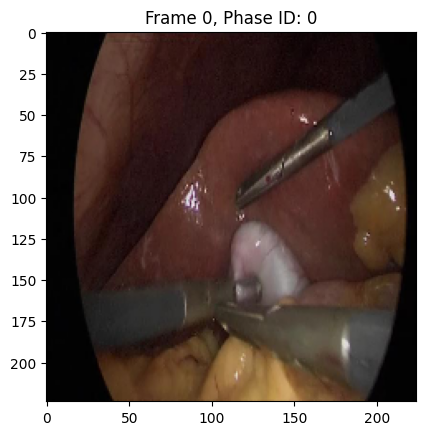

Pixel range for frame 0: min=0.0, max=0.9882352948188782


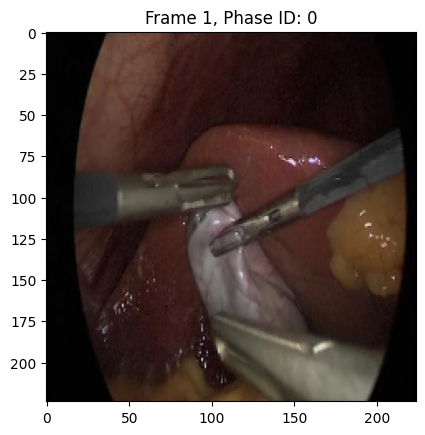

Pixel range for frame 1: min=0.0, max=0.9764705896377563


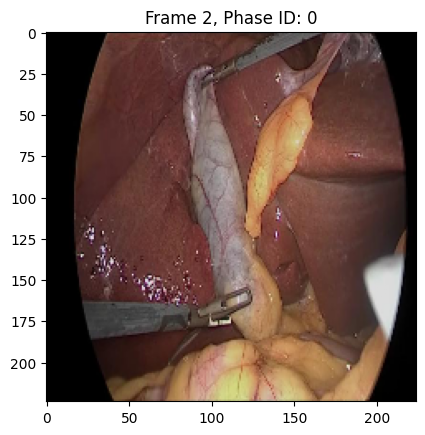

Pixel range for frame 2: min=0.0, max=0.9921568632125854


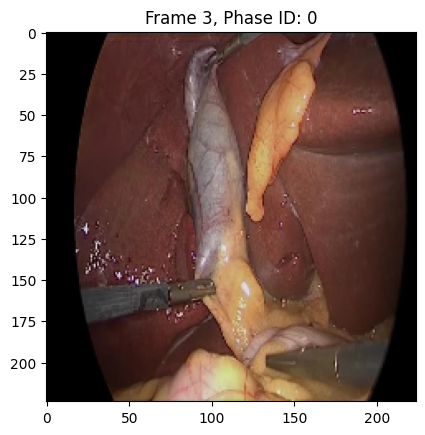

Pixel range for frame 3: min=0.0, max=0.9960784316062927


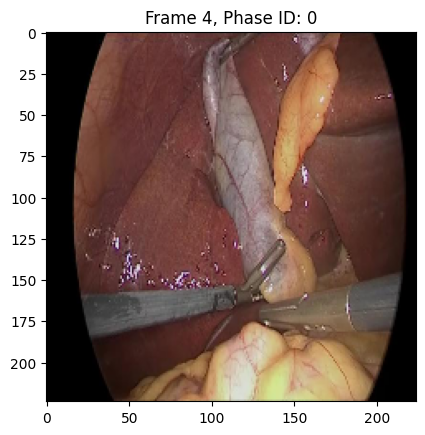

Pixel range for frame 4: min=0.0, max=1.0


In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    img = X_loaded[i]
    label = Y_loaded[i]

    plt.figure()
    plt.imshow(img.astype('uint8') if img.max() > 1 else img)
    plt.title(f"Frame {i}, Phase ID: {label}")
    plt.show()

    print(f"Pixel range for frame {i}: min={img.min()}, max={img.max()}")

In [ ]:
from collections import Counter
print("Class counts:", Counter(Y_loaded))

Class counts: Counter({np.int64(0): 327, np.int64(1): 300, np.int64(2): 300, np.int64(3): 300, np.int64(4): 300, np.int64(5): 300, np.int64(6): 300})


Different Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

# ---------- Parameters ----------
IMG_SIZE = 224
NUM_CLASSES = len(np.unique(Y_loaded))  # 7 classes
SEED = 42
tf.random.set_seed(SEED)

# ---------- Backbone ----------
base_model = EfficientNetB0(include_top=False, weights='imagenet',
                            input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = True  # fine-tune entire backbone

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=True)
x = layers.GlobalAveragePooling2D()(x)  # Flatten spatial dimensions

# ---------- Multi-Head Attention ----------
# reshape for attention: (batch, sequence_length=1, features)
x_seq = layers.Reshape((1, x.shape[-1]))(x)
attn_output = layers.MultiHeadAttention(num_heads=4, key_dim=128)(x_seq, x_seq)
attn_output = layers.Flatten()(attn_output)  # back to (batch, features)

# ---------- Classification Head ----------
x = layers.Concatenate()([x, attn_output])
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

# ---------- Model ----------
model = models.Model(inputs, outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',  # use integer labels directly
    metrics=['accuracy']
)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 7, 7,      │  4,049,571 │ input_layer_3[0]… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ efficientnetb0[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 1, 1280)   │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 1280)   │  2,624,256 │ reshape_2[0][0],  │
│ (MultiHeadAttentio… │                   │            │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 1280)      │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 2560)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 2560)      │          0 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 7)         │     17,927 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,691,754 (25.53 MB)

 Trainable params: 6,649,731 (25.37 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# ---------- Callbacks ----------
checkpoint_path = "best_model.h5"

callbacks = [
    # Reduce LR if val_loss plateaus
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        verbose=1,
        min_lr=1e-6
    ),
    # Stop training if val_loss doesn't improve
    EarlyStopping(
        monitor='val_loss',
        patience=7,
        verbose=1,
        restore_best_weights=True
    ),
    # Save best model
    ModelCheckpoint(
        checkpoint_path,
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

print("Callbacks ready. Model will save best weights to:", checkpoint_path)

Callbacks ready. Model will save best weights to: best_model.h5


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    epochs=4,
    batch_size=16,
    shuffle=True,
    callbacks=callbacks
)

Epoch 1/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2996 - loss: 1.8036
Epoch 1: val_loss improved from inf to 2.08489, saving model to best_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 435s 5s/step - accuracy: 0.3015 - loss: 1.8006 - val_accuracy: 0.1197 - val_loss: 2.0849 - learning_rate: 1.0000e-04
Epoch 2/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7985 - loss: 0.6892
Epoch 2: val_loss did not improve from 2.08489
80/80 ━━━━━━━━━━━━━━━━━━━━ 369s 5s/step - accuracy: 0.7988 - loss: 0.6877 - val_accuracy: 0.1197 - val_loss: 2.4598 - learning_rate: 1.0000e-04
Epoch 3/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9304 - loss: 0.2339
Epoch 3: val_loss improved from 2.08489 to 2.08394, saving model to best_model.h5


80/80 ━━━━━━━━━━━━━━━━━━━━ 385s 5s/step - accuracy: 0.9307 - loss: 0.2333 - val_accuracy: 0.1502 - val_loss: 2.0839 - learning_rate: 1.0000e-04
Epoch 4/4
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9800 - loss: 0.0740
Epoch 4: val_loss did not improve from 2.08394
80/80 ━━━━━━━━━━━━━━━━━━━━ 388s 5s/step - accuracy: 0.9801 - loss: 0.0739 - val_accuracy: 0.2418 - val_loss: 2.3028 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 3.
